### **Bus Dataset**

from google.colab import drive
drive.mount('/content/drive')

## **Tasks**

1. Total Distance per trip
2. Average Velocity per trip
3. How many stops made per trip
4. How long waiting time per stops
5. Total time trip took
6. Route Visualization in Google Map for each bus


### **Exploratory Data Analysis**

In [1]:
%%capture

! pip install geopandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


import geopandas as gpd
import plotly.express as px
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)
pd.pandas.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv("/content/Hajj Bus Data.csv")
df.head(100)

,id,bus_id,bus_serial,company_id,angle,lat,long,gsm_signal,gps_signal,ignition,movement,speed,sos,supply_cutoff,record_time,extra
0,36899,101853800,8036,11,150,21.450854,39.601152,3,2,OFF,0,0,0,0,7/13/2018 12:08,NaN
1,42543,101853800,8036,11,151,21.450861,39.601136,3,2,OFF,0,0,0,0,7/13/2018 12:10,NaN
2,163768,101853800,8036,11,153,21.450899,39.601081,3,2,OFF,0,0,0,0,7/13/2018 12:42,NaN
3,172448,101853800,8036,11,153,21.450915,39.601086,3,2,OFF,0,0,0,0,7/13/2018 12:44,NaN
4,178089,101853800,8036,11,151,21.450902,39.601095,3,2,OFF,0,0,0,0,7/13/2018 12:46,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5812157,101853800,8036,11,155,21.450841,39.601097,3,2,OFF,0,0,0,0,7/14/2018 6:10,NaN
96,5830715,101853800,8036,11,155,21.450841,39.601097,3,2,OFF,0,0,0,0,7/14/2018 6:12,NaN
97,5850111,101853800,8036,11,154,21.450859,39.601100,3,2,OFF,0,0,0,0,7/14/2018 6:14,NaN
98,5866544,101853800,8036,11,154,21.450859,39.601100,3,2,OFF,0,0,0,0,7/14/2018 6:16,NaN


In [4]:
df.shape

(42002, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42002 entries, 0 to 42001
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             42002 non-null  int64  
 1   bus_id         42002 non-null  int64  
 2   bus_serial     42002 non-null  int64  
 3   company_id     42002 non-null  int64  
 4   angle          42002 non-null  int64  
 5   lat            42002 non-null  float64
 6   long           42002 non-null  float64
 7   gsm_signal     42002 non-null  int64  
 8   gps_signal     42002 non-null  int64  
 9   ignition       42002 non-null  object 
 10  movement       42002 non-null  int64  
 11  speed          42002 non-null  int64  
 12  sos            42002 non-null  int64  
 13  supply_cutoff  42002 non-null  int64  
 14  record_time    42002 non-null  object 
 15  extra          0 non-null      float64
dtypes: float64(3), int64(11), object(2)
memory usage: 5.1+ MB


In [6]:
df.isnull().sum()

id                   0
bus_id               0
bus_serial           0
company_id           0
angle                0
lat                  0
long                 0
gsm_signal           0
gps_signal           0
ignition             0
movement             0
speed                0
sos                  0
supply_cutoff        0
record_time          0
extra            42002
dtype: int64

#### **Dropping columns with NaN**

In [7]:
df.drop("extra", axis=1, inplace=True)
df.head(2)

,id,bus_id,bus_serial,company_id,angle,lat,long,gsm_signal,gps_signal,ignition,movement,speed,sos,supply_cutoff,record_time
0,36899,101853800,8036,11,150,21.450854,39.601152,3,2,OFF,0,0,0,0,7/13/2018 12:08
1,42543,101853800,8036,11,151,21.450861,39.601136,3,2,OFF,0,0,0,0,7/13/2018 12:10


#### **Replacing OFF to 0 and ON to 1**

In [8]:
df["ignition"].unique()

df["ignition"].replace(["OFF","ON "],[0,1], inplace=True) 

In [9]:
df["ignition"].value_counts()

0    40772
1     1230
Name: ignition, dtype: int64

### **Splitting record_time to record_date & record_time**

In [10]:
df[["record_date","record_time"]] = df["record_time"].str.split(" ",expand=True)
pd.to_datetime(df["record_date"], format="%m/%d/%Y")
pd.to_datetime(df["record_time"], format="%H:%M")
df.head(2)

,id,bus_id,bus_serial,company_id,angle,lat,long,gsm_signal,gps_signal,ignition,movement,speed,sos,supply_cutoff,record_time,record_date
0,36899,101853800,8036,11,150,21.450854,39.601152,3,2,0,0,0,0,0,12:08,7/13/2018
1,42543,101853800,8036,11,151,21.450861,39.601136,3,2,0,0,0,0,0,12:10,7/13/2018


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42002 entries, 0 to 42001
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             42002 non-null  int64  
 1   bus_id         42002 non-null  int64  
 2   bus_serial     42002 non-null  int64  
 3   company_id     42002 non-null  int64  
 4   angle          42002 non-null  int64  
 5   lat            42002 non-null  float64
 6   long           42002 non-null  float64
 7   gsm_signal     42002 non-null  int64  
 8   gps_signal     42002 non-null  int64  
 9   ignition       42002 non-null  int64  
 10  movement       42002 non-null  int64  
 11  speed          42002 non-null  int64  
 12  sos            42002 non-null  int64  
 13  supply_cutoff  42002 non-null  int64  
 14  record_time    42002 non-null  object 
 15  record_date    42002 non-null  object 
dtypes: float64(2), int64(12), object(2)
memory usage: 5.1+ MB


In [12]:
print(df["ignition"].unique())
print(df["movement"].unique())
print(df["speed"].unique())
print(df["sos"].unique())
print(df["supply_cutoff"].unique())

[0 1]
[0 1]
[ 0  5  2  4 15 25 17 19  6 58 13 72 59 48 50 45 49 16  7 54 62  9 64 60
 57 27 33 29 43 36 23 28  8 39 38 26 40 20 11 52 42 47 30 41 12 56 55 75
 70  3  1 46 32 22 24 37 14 67 76 71 69 95 93 97 88 89 92 73 65 63 83 77
 61 82 90 81]
[0]
[0]


### **Task 1: To find the Total Distance Per Trip**

#### **Plotting the Bus Route**

In [13]:
df_geo = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df["long"], df["lat"]))

df_geo.head(2)

,id,bus_id,bus_serial,company_id,angle,lat,long,gsm_signal,gps_signal,ignition,movement,speed,sos,supply_cutoff,record_time,record_date,geometry
0,36899,101853800,8036,11,150,21.450854,39.601152,3,2,0,0,0,0,0,12:08,7/13/2018,POINT (39.60115 21.45085)
1,42543,101853800,8036,11,151,21.450861,39.601136,3,2,0,0,0,0,0,12:10,7/13/2018,POINT (39.60114 21.45086)


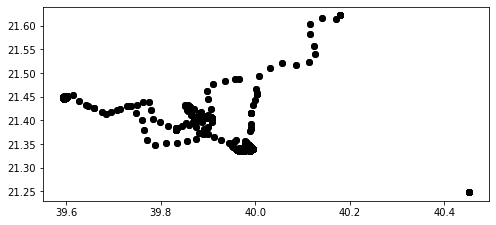

In [14]:
axis = df_geo["geometry"].plot(color ="blue", edgecolor="black") 

df_geo.plot(ax = axis, color = "black")

In [15]:
df.head(3)

,id,bus_id,bus_serial,company_id,angle,lat,long,gsm_signal,gps_signal,ignition,movement,speed,sos,supply_cutoff,record_time,record_date,geometry
0,36899,101853800,8036,11,150,21.450854,39.601152,3,2,0,0,0,0,0,12:08,7/13/2018,POINT (39.60115 21.45085)
1,42543,101853800,8036,11,151,21.450861,39.601136,3,2,0,0,0,0,0,12:10,7/13/2018,POINT (39.60114 21.45086)
2,163768,101853800,8036,11,153,21.450899,39.601081,3,2,0,0,0,0,0,12:42,7/13/2018,POINT (39.60108 21.45090)


In [16]:
%%capture
bus_on_move = df[df["movement"] == 1]

bus_on_move["record_time"] = pd.to_datetime(bus_on_move['record_time']).dt.strftime('%H:%M:%S')
bus_on_move["record_time"] = pd.to_timedelta(bus_on_move["record_time"])

In [17]:
bus_on_move.tail(100)

,id,bus_id,bus_serial,company_id,angle,lat,long,gsm_signal,gps_signal,ignition,movement,speed,sos,supply_cutoff,record_time,record_date,geometry
30965,561207342,101853800,8036,11,657,21.622035,40.179215,3,2,1,1,95,0,0,0 days 03:52:00,9/3/2018,POINT (40.17922 21.62203)
30966,561228020,101853800,8036,11,657,21.622035,40.179215,3,2,1,1,95,0,0,0 days 03:54:00,9/3/2018,POINT (40.17922 21.62203)
30967,561674421,101853800,8036,11,657,21.622035,40.179215,3,2,1,1,95,0,0,0 days 04:30:00,9/3/2018,POINT (40.17922 21.62203)
30968,561700718,101853800,8036,11,657,21.622035,40.179215,3,2,1,1,95,0,0,0 days 04:32:00,9/3/2018,POINT (40.17922 21.62203)
30969,562137138,101853800,8036,11,657,21.622035,40.179215,3,2,1,1,95,0,0,0 days 05:16:00,9/3/2018,POINT (40.17922 21.62203)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31160,563308267,101853800,8036,11,657,21.622035,40.179215,3,2,1,1,95,0,0,0 days 06:50:00,9/3/2018,POINT (40.17922 21.62203)
31161,564018516,101853800,8036,11,657,21.622035,40.179215,3,2,1,1,95,0,0,0 days 07:48:00,9/3/2018,POINT (40.17922 21.62203)
31162,564046735,101853800,8036,11,657,21.622035,40.179215,3,2,1,1,95,0,0,0 days 07:50:00,9/3/2018,POINT (40.17922 21.62203)
31200,564331093,101853800,8036,11,657,21.622035,40.179215,3,2,1,1,95,0,0,0 days 08:14:00,9/3/2018,POINT (40.17922 21.62203)


In [18]:
print(f'Number of trip took by a bus: {len(bus_on_move["record_date"].unique())}')
print(f'The total time took per trip is: {bus_on_move["record_time"].mean()}')

Number of trip took by a bus: 9
The total time took per trip is: 0 days 12:04:32.146341463


In [19]:
speed = round(bus_on_move["speed"].mean(),2)
print(f'Average speed of a bus is: {speed}')
distancePerTrip = speed*12
print(f'Total distance travelled per trip is: {distancePerTrip} km')

Average speed of a bus is: 41.61
Total distance travelled per trip is: 499.32 km


## **Task 2: Average Velocity per trip**

In [20]:
print(f'The Average Velocity per trip is: {distancePerTrip/12}')

The Average Velocity per trip is: 41.61


## **Task 3: How many stops made per trip.**

In [21]:
len(df[df["movement"] == 0])

40772

In [22]:
print(f'The number of stops made per trip are: {len(df[(df["record_date"] == "7/13/2018") & (df["ignition"] == 0)])}')

The number of stops made per trip are: 181


## **Task 4: How long waiting time per stop**

In [23]:
df["record_time"] = pd.to_datetime(df['record_time']).dt.strftime('%H:%M:%S')

In [24]:
df["record_time"] = pd.to_timedelta(df["record_time"])
print(df["record_time"].mean()/181)
print("The waiting time per stop is 3 minutes 58 seconds")

0 days 00:03:58.588930650
The waiting time per stop is 3 minutes 58 seconds


## **Task 5: Total time trip took**

In [25]:
print(f'Number of trip took by a bus: {len(bus_on_move["record_date"].unique())}')
print(f'The total time trip took is: {bus_on_move["record_time"].mean()}')

Number of trip took by a bus: 9
The total time trip took is: 0 days 12:04:32.146341463


## **Task 6: Route Visualization in Google Map**

In [26]:
%%capture
! pip install plotly
! pip install chart-studio
! pip install mapbox

In [27]:
geo = np.unique(df[['lat', 'long']], axis=0)
geo = pd.DataFrame(geo)
geo.head()

,0,1
0,21.248421,40.452477
1,21.248431,40.452470
2,21.248438,40.452510
3,21.248447,40.451771
4,21.248457,40.452697


In [29]:
from chart_studio import plotly as py
import chart_studio
import plotly.tools as tl
import plotly.graph_objs as go
import pandas as pd


# API key for Plotly 
chart_studio.tools.set_credentials_file(username='helius', api_key='ZfRrK7H5ftQw1JLDfKYP')


# Mapbox access token here 

mapbox_access_token = 'pk.eyJ1IjoiYXNjaHJvY2siLCJhIjoiY2p2NnRoeHc2MDkxbTQ0bnR6aTVwZDNsaCJ9.MA76hkxD3rOGgnVCDBVC9w'

df = pd.read_csv('/content/Hajj Bus Data.csv')

# Save latitude and longitude as variables. In this dataset, the X column is longitude and the Y column is latitude. 

site_lat = geo[0]
site_lon = geo[1]


# Generate the data for the map 

data = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=3,
            color='rgb(255, 0, 0)',
            opacity=1
        ),
    ),
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=8,
            color='#0000FF',
            opacity=0.8
        ),
        hoverinfo='none'
    )]
# Generate a layout around Mecca and Marina , zoomed in so we can see the data points 

layout = go.Layout(
    title='Hajj Bus Stops',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat= 21.422510,
            lon=39.826168
        ),
        pitch=0,
        zoom=9.8,
        style='streets'
    ),
)
fig = dict(data=data,layout=layout)
py.iplot(fig, filename='Hajj')